In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pre = pd.read_csv('anon_pre.csv')
post = pd.read_csv('anon_post.csv')
cis = pd.read_csv('anon_cis.csv')

In [3]:
first_year_id = cis[cis.Q18=='First year (introductory) lab'].ResponseId
buffy_id = cis[cis.Q18=='Beyond the first year lab'].ResponseId

In [4]:
pre[pre.ResponseId.isin(first_year_id)].groupby('ResponseId').count().anon_student_id

ResponseId
R_07Da2Gq3VTM9SwN     23
R_0GPGaYXN7Pxw8SZ     63
R_0OqBHbsKsibd6tX     37
R_0ULtSeLpwqYLs5P     34
R_0p899uvb7xDI3h7     40
                    ... 
R_velDaFcM5BY4OlP      7
R_vqAjIXFp93ssqUF    160
R_wWT32FHXaXLRIEp    144
R_xlqjUWCfUOQ83JL    460
R_z6TfhdAtQUGJnGh    134
Name: anon_student_id, Length: 287, dtype: int64

In [5]:
pre[pre.ResponseId.isin(buffy_id)].shape

(5694, 66)

In [6]:
dates = cis[['Q6', 'ResponseId']]

# TODO
# 1. get counts of survey responses per responseID for PRE intro/buffy
first_year_pre = pre[pre.ResponseId.isin(first_year_id)].groupby('ResponseId').count().anon_student_id
buffy_pre = pre[pre.ResponseId.isin(buffy_id)].groupby('ResponseId').count().anon_student_id

# 2. get counts of survey responses per responseID for POST intro/buffy
first_year_post = post[post.ResponseId.isin(first_year_id)].groupby('ResponseId').count().anon_student_id
buffy_post = post[post.ResponseId.isin(buffy_id)].groupby('ResponseId').count().anon_student_id

# 3. chart by date the number of responses
# 4. maybe group by some reduced date amount

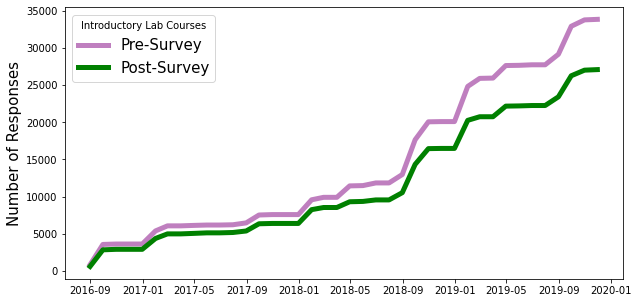

In [7]:
first_year_pre_cnts = first_year_pre.reset_index().merge(dates)[['Q6', 'anon_student_id']]
first_year_pre_cnts.columns = ['date_administered', 'pre_cnts']
first_year_post_cnts = first_year_post.reset_index().merge(dates)[['Q6', 'anon_student_id']]
first_year_post_cnts.columns = ['date_administered', 'post_cnts']
first_year_cnts = pd.concat([first_year_pre_cnts, first_year_post_cnts])
first_year_cnts['date_administered'] = pd.to_datetime(first_year_cnts.date_administered)
first_year_cnts.set_index('date_administered', inplace=True)
first_year_data = first_year_cnts.groupby(pd.Grouper(freq='M')).sum().cumsum()

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(first_year_data.index, first_year_data.pre_cnts, color='purple', linewidth=5, alpha=0.5, label='Pre-Survey')
ax.plot(first_year_data.index, first_year_data.post_cnts, color='green', linewidth=5, label='Post-Survey')

ax.set_ylabel('Number of Responses', fontsize=15)
ax.legend(title='Introductory Lab Courses', fontsize=15)
# ax.set_xticks(np.arange(0, 10, 2))
# ax.set_xticklabels(pd.date_range(2016, 2020, 5))

In [8]:
first_year_data.max()

pre_cnts     33885.0
post_cnts    27112.0
dtype: float64

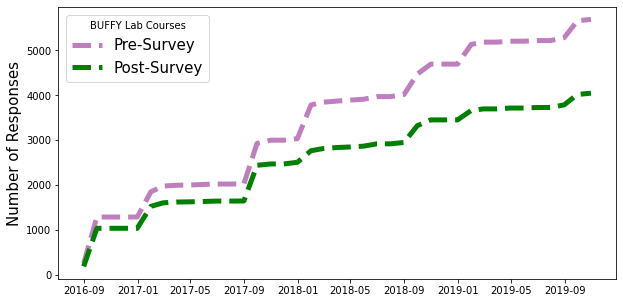

In [9]:
buffy_pre_cnts = buffy_pre.reset_index().merge(dates)[['Q6', 'anon_student_id']]
buffy_pre_cnts.columns = ['date_administered', 'pre_cnts']
buffy_post_cnts = buffy_post.reset_index().merge(dates)[['Q6', 'anon_student_id']]
buffy_post_cnts.columns = ['date_administered', 'post_cnts']
buffy_pre_cnts = pd.concat([buffy_pre_cnts, buffy_post_cnts])
buffy_pre_cnts['date_administered'] = pd.to_datetime(buffy_pre_cnts.date_administered)
buffy_pre_cnts.set_index('date_administered', inplace=True)
data = buffy_pre_cnts.groupby(pd.Grouper(freq='M')).sum().cumsum()

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(data.index, data.pre_cnts, color='purple', linewidth=5, alpha=0.5, label='Pre-Survey', linestyle='--')
ax.plot(data.index, data.post_cnts, color='green', linewidth=5, label='Post-Survey', linestyle='--')

ax.set_ylabel('Number of Responses', fontsize=15)
ax.legend(title='BUFFY Lab Courses', fontsize=15)
# ax.set_xticks(np.arange(0, 10, 2))
# ax.set_xticklabels(pd.date_range(2016, 2020, 5))

In [10]:
data.max()

pre_cnts     5694.0
post_cnts    4047.0
dtype: float64

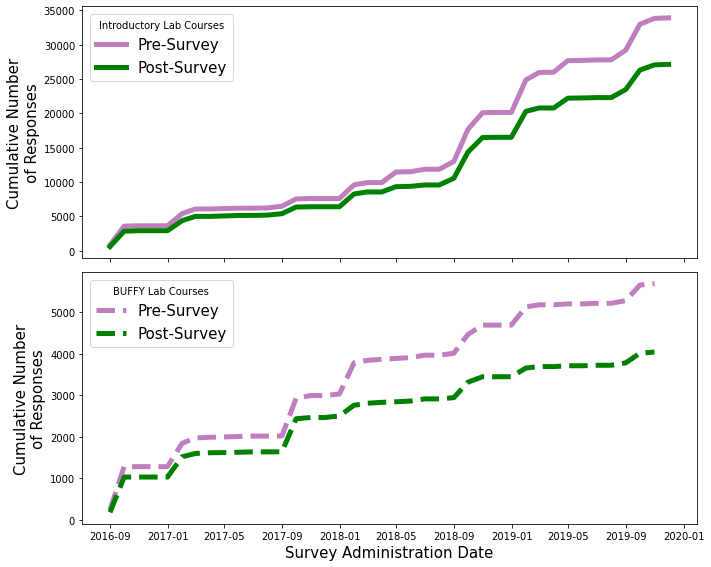

In [11]:
first_year_pre_cnts = first_year_pre.reset_index().merge(dates)[['Q6', 'anon_student_id']]
first_year_pre_cnts.columns = ['date_administered', 'pre_cnts']
first_year_post_cnts = first_year_post.reset_index().merge(dates)[['Q6', 'anon_student_id']]
first_year_post_cnts.columns = ['date_administered', 'post_cnts']
first_year_cnts = pd.concat([first_year_pre_cnts, first_year_post_cnts])
first_year_cnts['date_administered'] = pd.to_datetime(first_year_cnts.date_administered)
first_year_cnts.set_index('date_administered', inplace=True)
first_year_data = first_year_cnts.groupby(pd.Grouper(freq='M')).sum().cumsum()

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax.plot(first_year_data.index, first_year_data.pre_cnts, color='purple', linewidth=5, alpha=0.5, label='Pre-Survey')
ax.plot(first_year_data.index, first_year_data.post_cnts, color='green', linewidth=5, label='Post-Survey')

ax.set_ylabel('Cumulative Number\nof Responses', fontsize=15)
ax.legend(title='Introductory Lab Courses', fontsize=15)
# ax.set_xticks(np.arange(0, 10, 2))
# ax.set_xticklabels(pd.date_range(2016, 2020, 5))

buffy_pre_cnts = buffy_pre.reset_index().merge(dates)[['Q6', 'anon_student_id']]
buffy_pre_cnts.columns = ['date_administered', 'pre_cnts']
buffy_post_cnts = buffy_post.reset_index().merge(dates)[['Q6', 'anon_student_id']]
buffy_post_cnts.columns = ['date_administered', 'post_cnts']
buffy_pre_cnts = pd.concat([buffy_pre_cnts, buffy_post_cnts])
buffy_pre_cnts['date_administered'] = pd.to_datetime(buffy_pre_cnts.date_administered)
buffy_pre_cnts.set_index('date_administered', inplace=True)
data = buffy_pre_cnts.groupby(pd.Grouper(freq='M')).sum().cumsum()

# fig, ax = plt.subplots(figsize=(10, 5))

ax2.plot(data.index, data.pre_cnts, color='purple', linewidth=5, alpha=0.5, label='Pre-Survey', linestyle='--')
ax2.plot(data.index, data.post_cnts, color='green', linewidth=5, label='Post-Survey', linestyle='--')

ax2.set_ylabel('Cumulative Number\nof Responses', fontsize=15)
ax2.legend(title='BUFFY Lab Courses', fontsize=15)
# ax.set_xticks(np.arange(0, 10, 2))
# ax.set_xticklabels(pd.date_range(2016, 2020, 5))

ax2.set_xlabel('Survey Administration Date', fontsize=15)

fig.tight_layout()
fig.savefig('cum_responses.pdf', bbox_inches='tight')